In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
from datetime import datetime

In [3]:
conversationsDf = pd.DataFrame({
    'date':[],
    'hour':[],
    'sender':[],
    'message':[]
})

os.system('cls')

0

In [4]:
with open("Conversa do WhatsApp com Cineminha.txt", "r", encoding="utf-8") as a:
    for txt in a:
        informations = re.findall (r"(\d{2}/\d{2}/\d{4}) (\d{2}:\d{2}) - ([^:]+): (.+)", txt)
        
        for i in informations:
            date, hour, sender, message = i

            newConversation = {
                'date':datetime.strptime(date, '%d/%m/%Y'),
                'hour':datetime.strptime(hour, '%H:%M').time(),
                'sender':sender,
                'message':message
            }        

            conversationsDf = conversationsDf._append(newConversation, ignore_index = True)
            conversationsDf = conversationsDf.reset_index(drop = True)

C:\Users\Yo\AppData\Local\Temp\ipykernel_1932\1626028984.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  conversationsDf = conversationsDf._append(newConversation, ignore_index = True)


In [10]:
allConversationsBySender = conversationsDf.loc[conversationsDf['sender'] == 'Nathan']

display (allConversationsBySender)

,date,hour,sender,message
630,2023-10-24,18:15:00,Nathan,eu sou de rio branco e estarei em rio branco s...
632,2023-10-24,18:16:00,Nathan,rio brancona
642,2023-10-25,15:53:00,Nathan,mentiroso
643,2023-10-25,15:53:00,Nathan,🤥🤥🤥
644,2023-10-25,15:53:00,Nathan,🤥🤥🤥🤥🤥🤥🤥???
...,...,...,...,...
4271,2024-10-02,23:30:00,Nathan,Boa
4338,2024-10-02,23:38:00,Nathan,<Mídia oculta>
4347,2024-10-02,23:38:00,Nathan,Pergunta pro Luiz
4350,2024-10-02,23:41:00,Nathan,E desde quando eu faço filme


In [20]:
qqtyConversationsBySenderByDate = pd.DataFrame({
    'sender':[],
    'date':[],
    'qtty':[]
})

allDates = allConversationsBySender['date'].unique().tolist()

sender = "Nathan"

for date in allDates:
    qtty = len (allConversationsBySender.loc[allConversationsBySender['date'] == date])

    qqtyConversationsBySenderByDate = qqtyConversationsBySenderByDate._append({
        'sender':sender,
        'date':date,
        'qtty':qtty
    }, ignore_index = True)
    qqtyConversationsBySenderByDate = qqtyConversationsBySenderByDate.reset_index(drop = True) 

display (qqtyConversationsBySenderByDate)

C:\Users\Yo\AppData\Local\Temp\ipykernel_1932\2839459289.py:14: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,sender,date,qtty
0,Nathan,2023-10-24,2.0
1,Nathan,2023-10-25,8.0
2,Nathan,2023-10-26,2.0
3,Nathan,2023-10-29,6.0
4,Nathan,2023-12-04,8.0
5,Nathan,2024-02-28,7.0
6,Nathan,2024-04-21,2.0
7,Nathan,2024-05-27,9.0
8,Nathan,2024-05-30,1.0
9,Nathan,2024-06-01,9.0


<Axes: xlabel='date'>

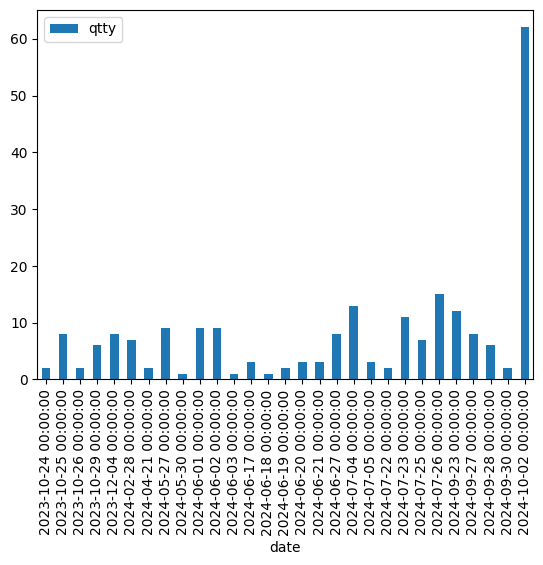

In [25]:
qqtyConversationsBySenderByDate.plot(kind='bar', x='date', y='qtty')

<Axes: xlabel='date'>

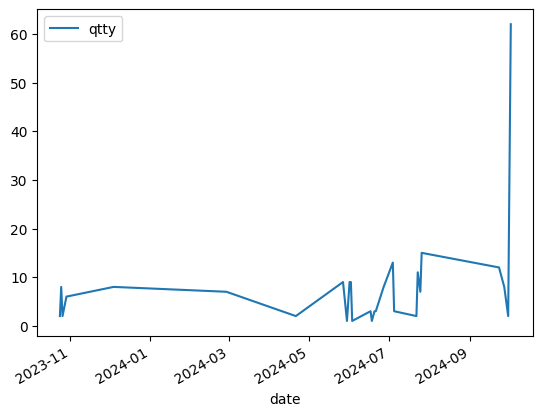

In [28]:
qqtyConversationsBySenderByDate.plot(kind='line', x='date', y='qtty')

In [32]:
conversationsByDate = conversationsDf.groupby(["date", "sender"]).size().reset_index(name="qtty")

display (conversationsByDate)

,date,sender,qtty
0,2022-04-27,Gustavo,3
1,2022-04-27,Lucas,1
2,2022-05-03,+55 61 9929-5150,1
3,2022-05-03,Lucas,3
4,2022-05-03,Luís Henrique,3
...,...,...,...
353,2024-10-02,Mateus Carioca,114
354,2024-10-02,Nathan,62
355,2024-10-02,Pato,37
356,2024-10-02,Ricardo,5


In [31]:
senders = conversationsDf['sender'].unique().tolist()

print(senders)

['Gustavo', 'Lucas', 'Luís Henrique', '+55 61 9929-5150', 'Pato', 'Luis', 'Mateus Carioca', 'Ricardo', 'Leo', 'Kauã', 'Luís Calabresa', 'Nathan', 'Dan', 'Celine', '+55 41 9261-6203', '+55 41 9969-6158']


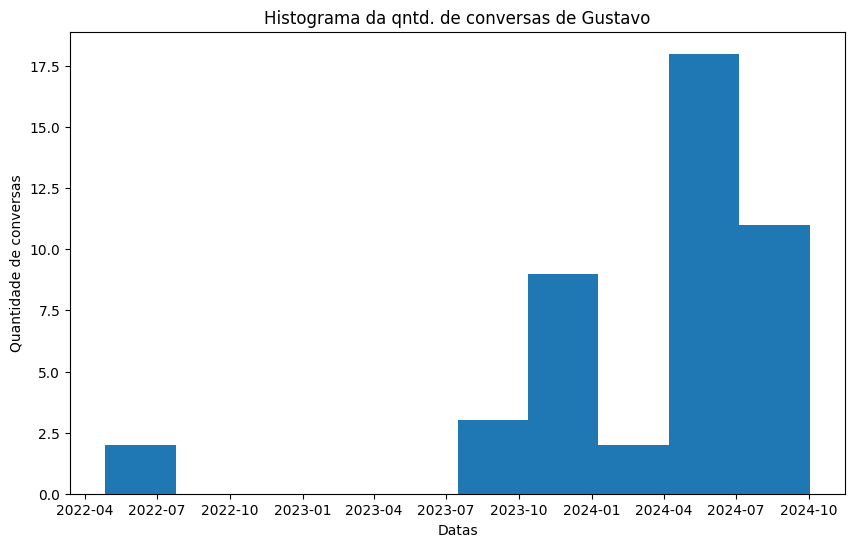

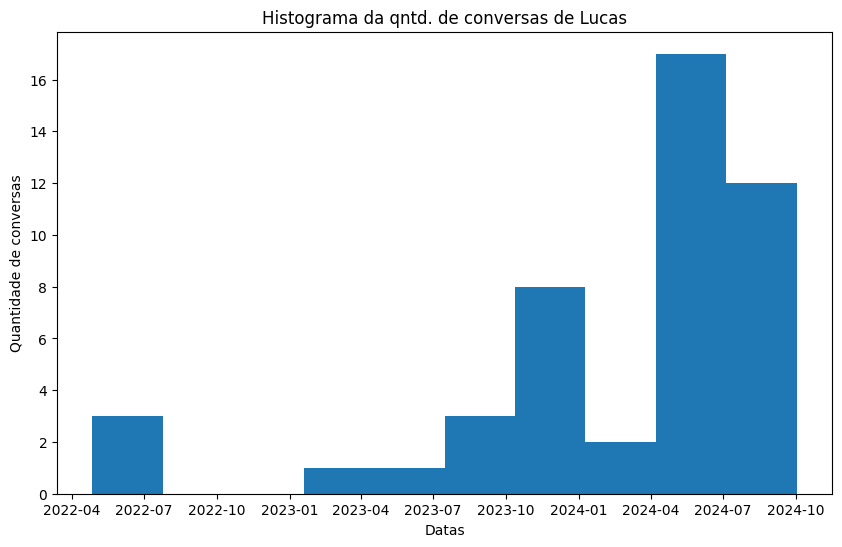

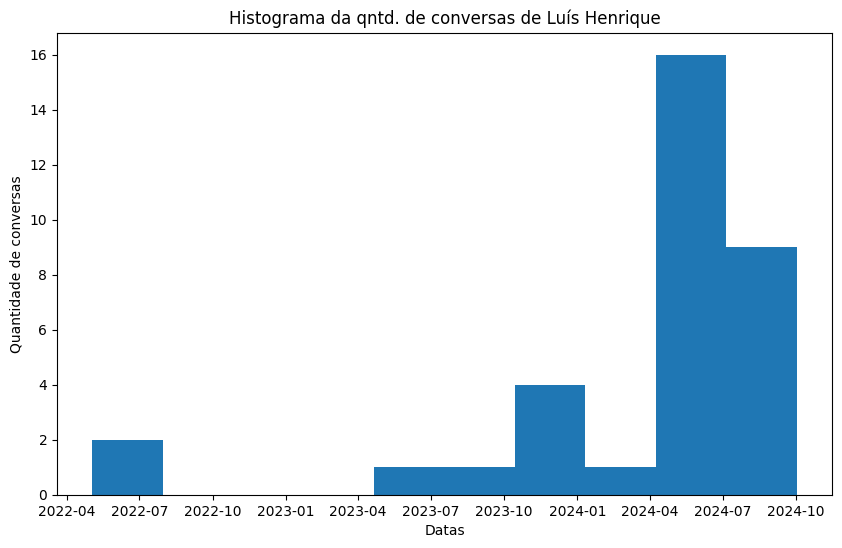

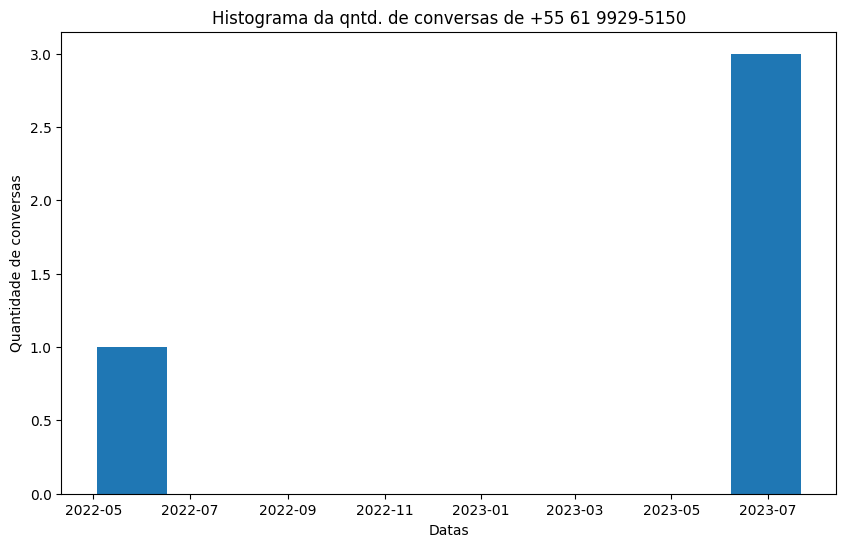

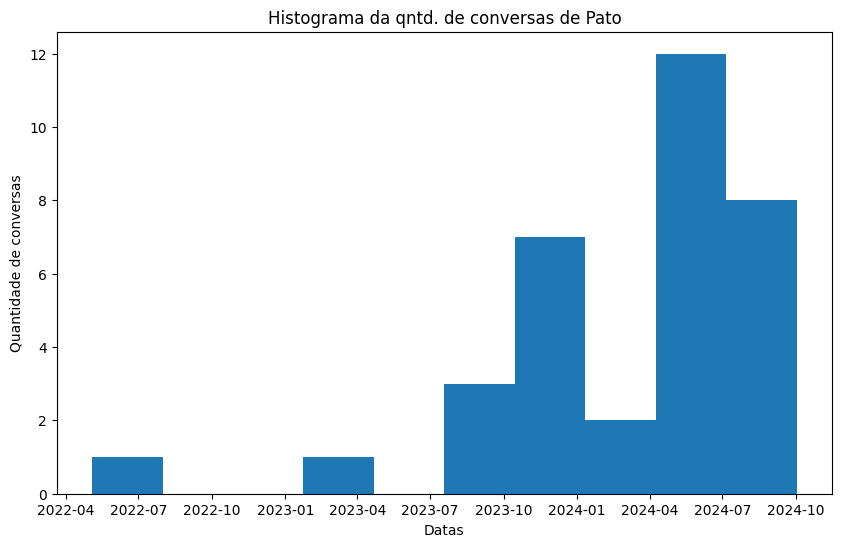

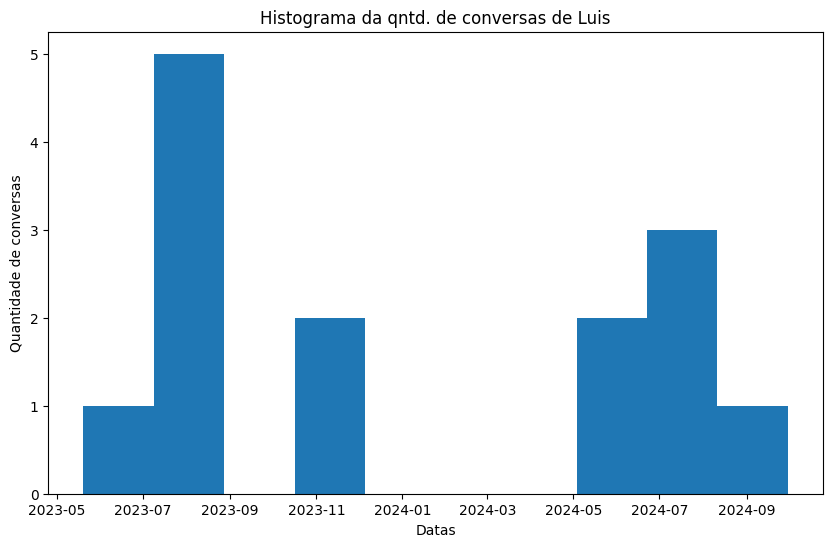

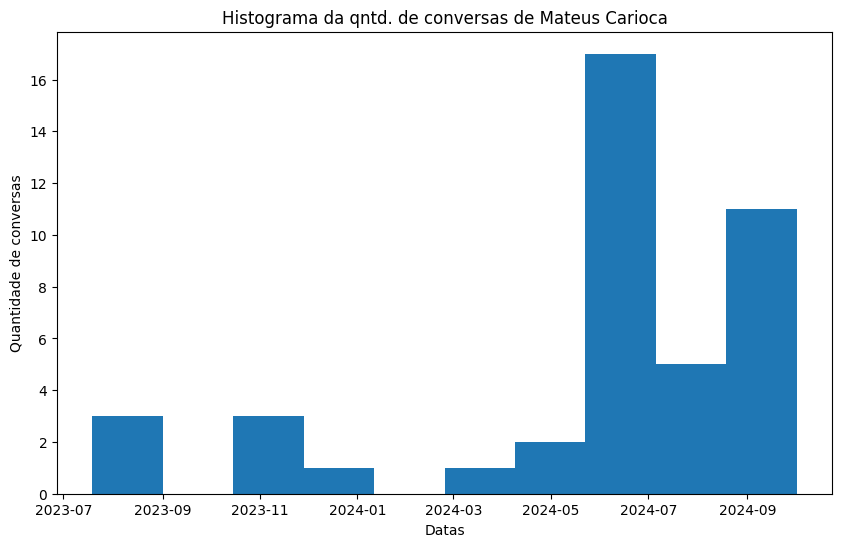

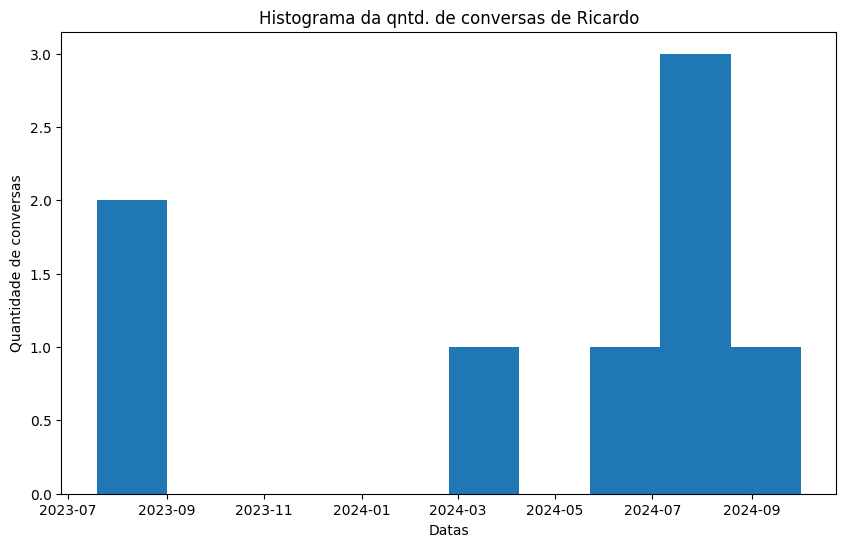

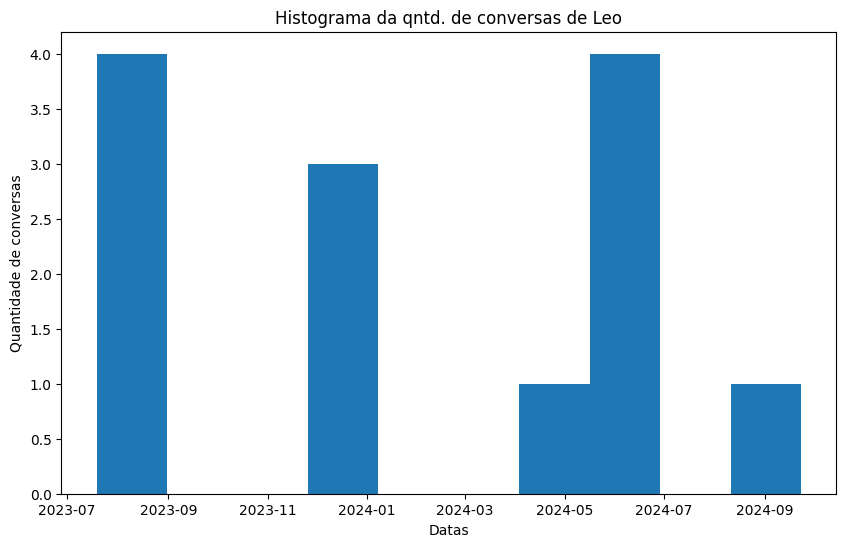

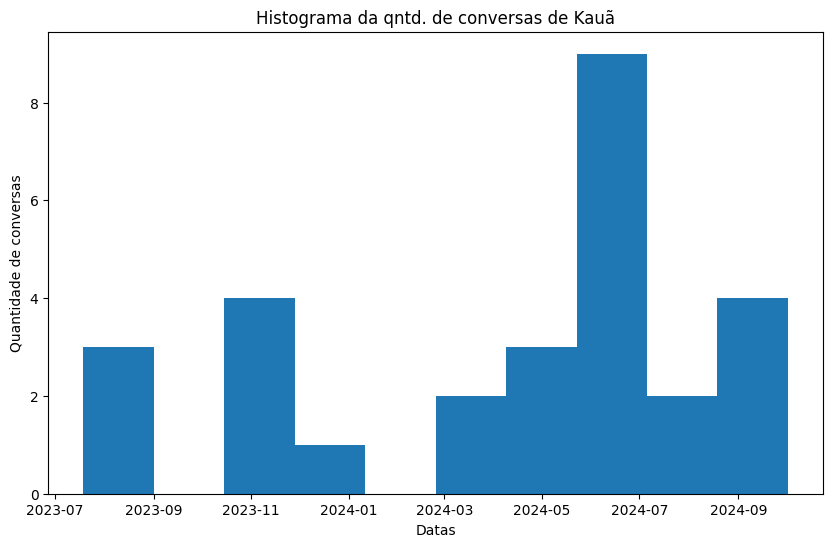

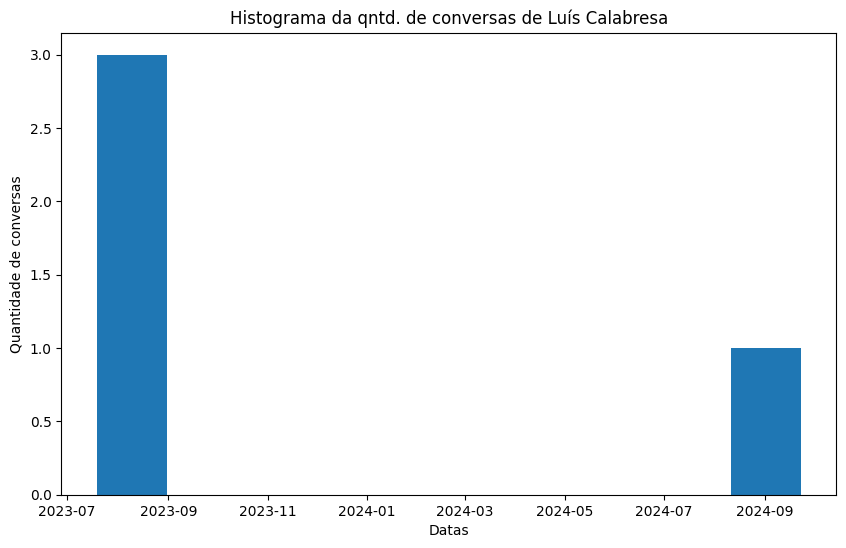

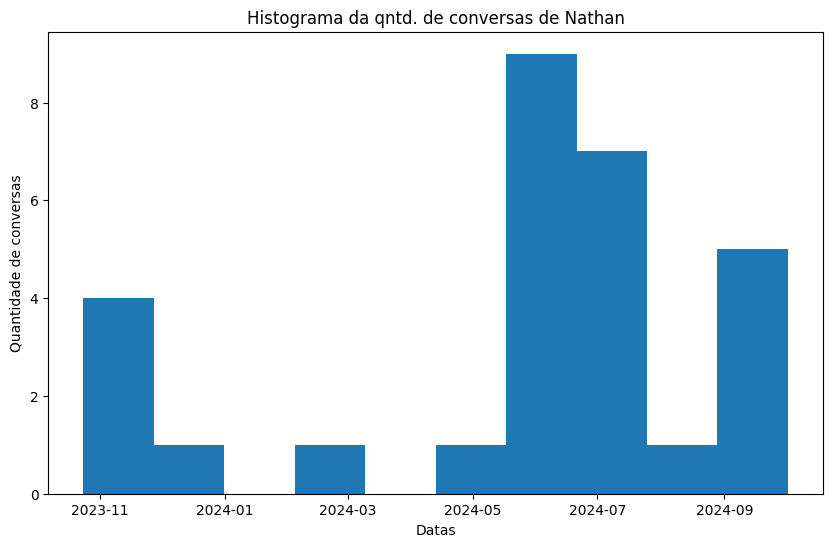

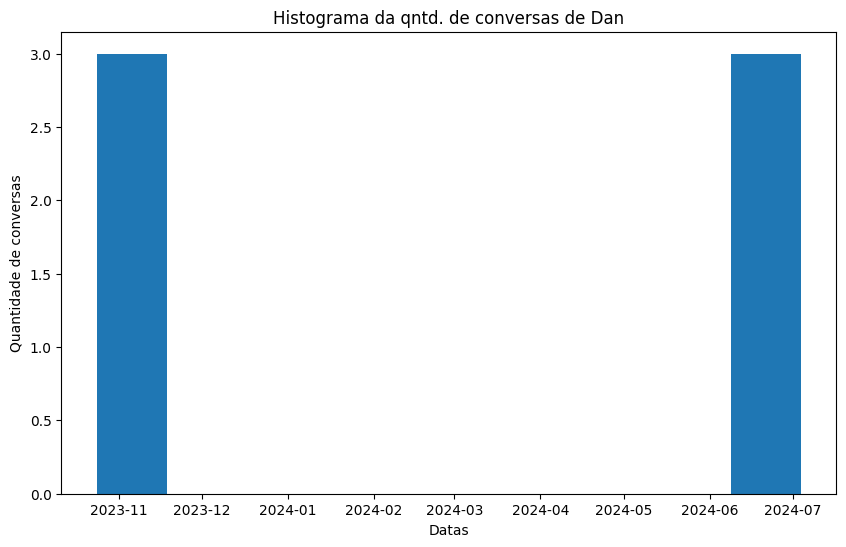

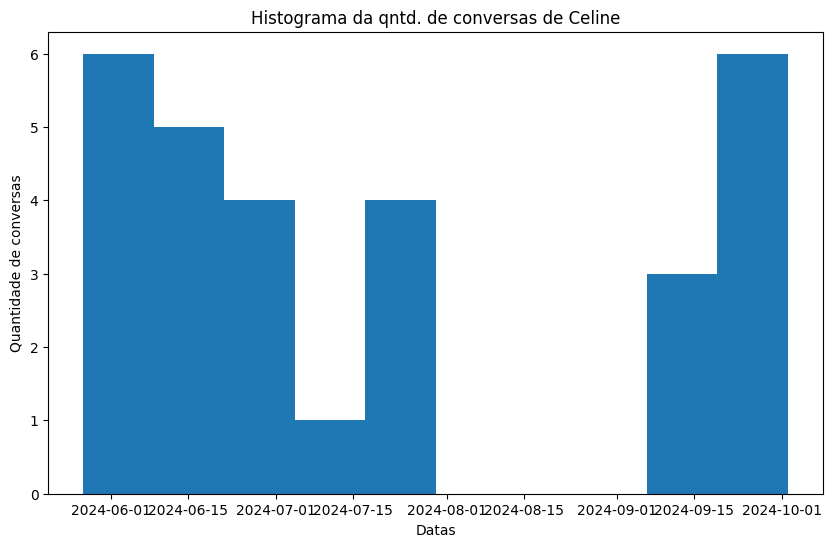

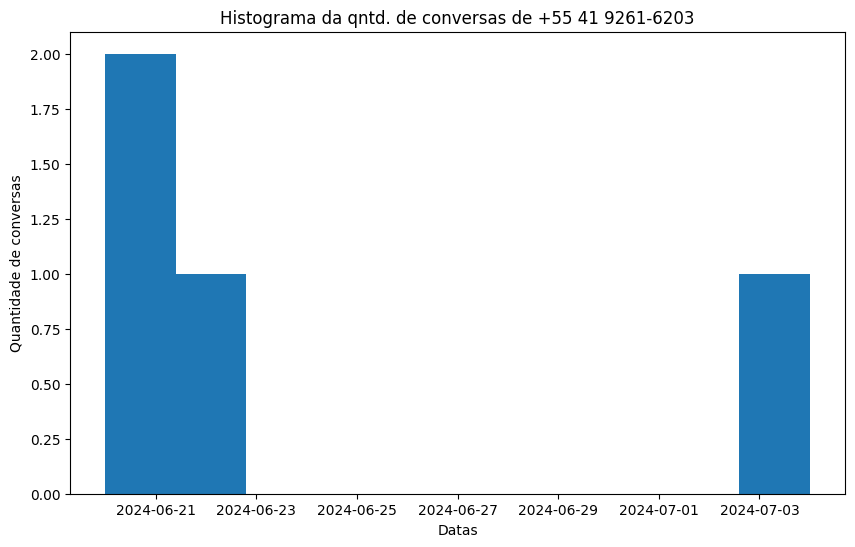

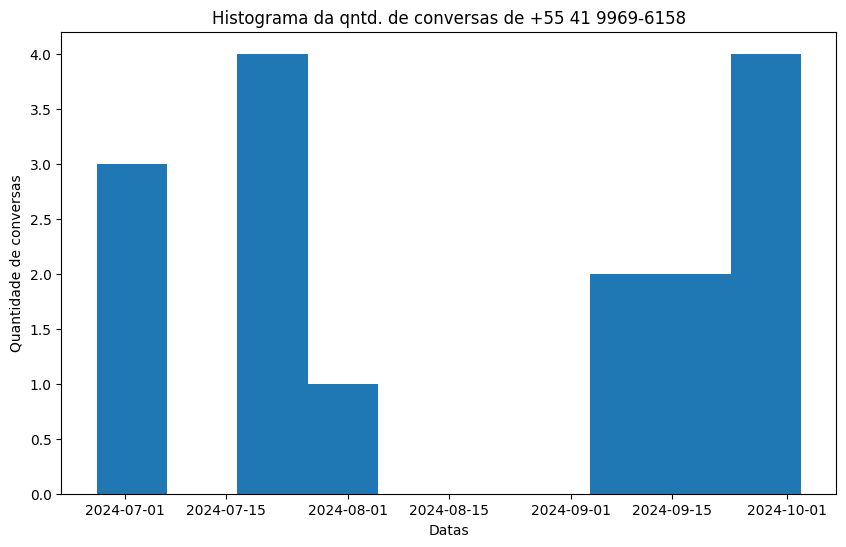

In [47]:

for sender in senders:
    conversationsByDateBySender = conversationsByDate[conversationsByDate['sender'] == sender]

    plt.figure(figsize=(10, 6))
    plt.hist(conversationsByDateBySender['date'], label=sender)
    plt.title(f'Histograma da qntd. de conversas de {sender}')
    plt.xlabel('Datas')
    plt.ylabel('Quantidade de conversas')

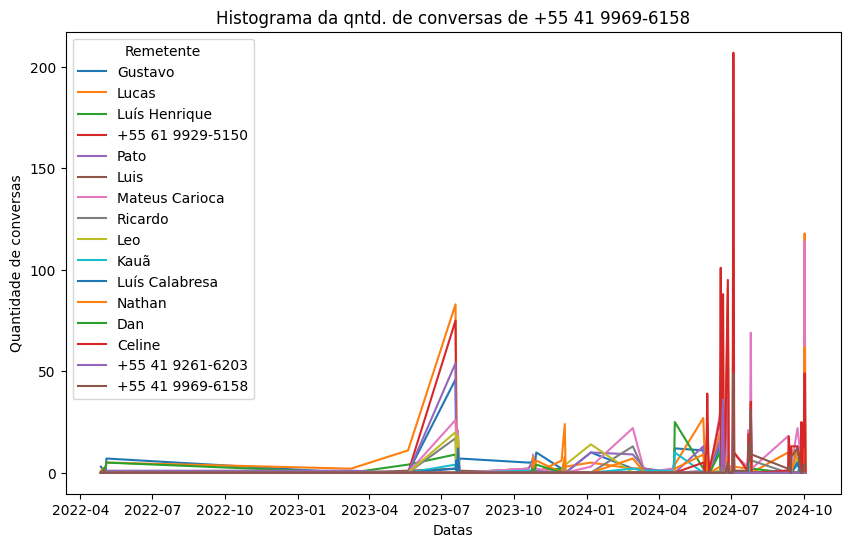

In [59]:
plt.figure(figsize=(10, 6))

pivot_df = conversationsByDate.pivot(index='date', columns='sender', values='qtty').fillna(0)

for sender in senders:
    conversationsByDateBySender = conversationsByDate[conversationsByDate['sender'] == sender]

    plt.plot(pivot_df.index, pivot_df[sender], label=sender)

plt.title(f'Histograma da qntd. de conversas de {sender}')
plt.xlabel('Datas')
plt.ylabel('Quantidade de conversas')
plt.legend(title="Remetente")

In [62]:
conversationsBySender = conversationsDf.groupby(["sender"]).size().reset_index(name="qtty")

display(conversationsBySender)

,sender,qtty
0,+55 41 9261-6203,69
1,+55 41 9969-6158,153
2,+55 61 9929-5150,107
3,Celine,929
4,Dan,19
5,Gustavo,596
6,Kauã,79
7,Leo,79
8,Lucas,851
9,Luis,39


Text(0.5, 1.0, 'Percentual de Mensagens por Remetente')

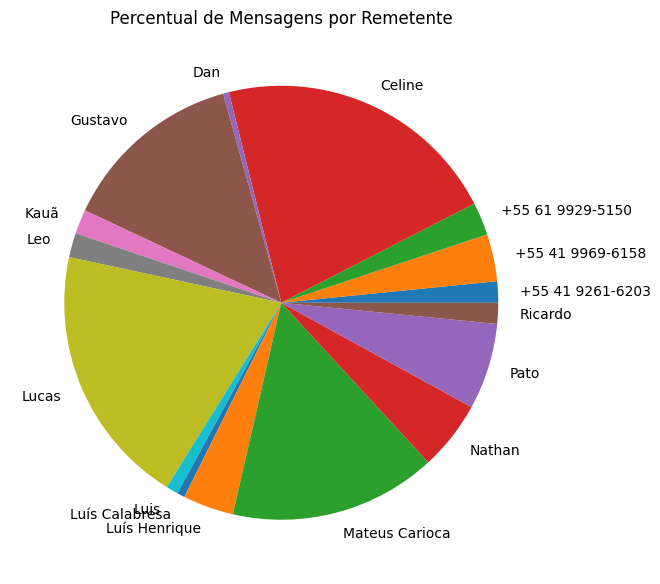

In [77]:
plt.figure(figsize=(7, 9))

plt.pie(conversationsBySender['qtty'], labels = conversationsBySender['sender'])

plt.title("Percentual de Mensagens por Remetente")
